<a href="https://colab.research.google.com/github/2hy03/Civil_Complaint/blob/main/department_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (32.2 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [1]:
pip install wordcloud matplotlib konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 7.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ODOC/minwon_df.csv', sep=",", dtype=str)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1227 non-null   object
 1   date      1227 non-null   object
 2   answer_x  1227 non-null   object
 3   content   1227 non-null   object
 4   answer_y  1226 non-null   object
 5   depart    1227 non-null   object
dtypes: object(6)
memory usage: 57.6+ KB


In [3]:
data

,title,date,answer_x,content,answer_y,depart
0,주차장이 너무 어두워요,2020.11.30,답변완료,중구 전동 25-328 번지옆 전동쉼터 옆 공영주차장이 야간에 너무 어두워요\n...,1. 구정 발전에 관심을 가져주시는 귀하께 감사의 말씀을 드립니다.2. 민원 제기하...,도시재생국 교통운수과
1,뭐에요? 거잠포선착장 쓰레기 그대로잖아요? 하나도 안 되어있네요?,2020.11.29,답변완료,아니 거기 오는 사람들을 위해서 버스정류장을 만들고 해안 데크길을 설치 했으면 그런...,1. 안녕하십니까? 귀하께서 상담민원을 통해 신청하신 민원에 대한 검토 결과를 다음...,국제도시건설국 농수산과
2,9100번 광역버스 배차간격 준수 요청 건,2020.11.23,답변완료,집안 사정으로 서구에서 남동구를 들려서 9100번 버스를 통해 인천에서 서울로 출퇴...,불편사항이 해결됨,도시재생국 교통운수과
3,46번버스 신흥교통 정상이아닌 버스업체,2020.11.23,답변완료,46번버스 신흥교통 손님에게 막말하고 잘못하고도 사과전혀없고 그냥 배째라는식으로 직...,1. 교통 업무에 많은 관심과 애정을 가져주셔서 깊이 감사드립니다. 2. 귀하께서 ...,도시재생국 교통운수과
4,살려주세요 제발 요즘 가게 망하게 만드는 일들만 일어나네요..제발요(영종도 호텔),2020.11.19,답변완료,요즘 전부 어렵죠?\n영종도는 공항 상대로 영업을 하는 가게들이 많아서 특히나 더 ...,1. 구정 발전을 위해 관심을 가져주시는 귀하께 깊은 감사를 드립니다.2. 모두가 ...,국제도시건설국 도시공원과
...,...,...,...,...,...,...
1222,교통지원과 담당자 지금 모하자는거에요??,2012.10.18,답변완료,중구청서 위탁한 사설 업체 수준이 바닥이니 이런 문제가 생기는거 아닙니까?\n\n당...,○ 구정업무 참여에 감사드리며 아래와 같이 답변드립니다.○ 귀하께서 견인차량을 찾을...,관광지원국 교통행정과
1223,보안등 설치 건의건,2012.10.18,답변완료,전동소방서에서 자유공원 광장 올라가는 길목에 선왕사라는 절이 있는데 그 건물 위 ...,"1. 평소 구정발전을 위하여 관심을 기울여 주신 귀하의 노고에 감사드리며, 귀하께서...",관광지원국 건설재난관리과
1224,대형화물차 주차하는자리에 자가용을 세웠는데요,2012.10.16,답변완료,제 신랑한테 방금 전화가 왔네요 중구에 화물받치는 자리에 세워놓은 자가용 견인해갓...,구정업무 참여에 감사드리며 다음과 같이 답변드립니다.귀하가 단속되신 구간은 주정차 ...,관광지원국 교통행정과
1225,79번 버스운전사를 고발합니다.,2012.10.15,답변완료,안녕하세요? 저는 79번버스를 퇴근하는 승객입니다.\n\n항상 탈때마다 느끼는건데....,항상 구정업무에 관심을 가져주셔서 대단히 감사합니다.귀하께서 제기하신 교통 불편 신...,관광지원국 교통행정과


In [7]:
data.depart.unique()

array(['도시재생국 교통운수과', '국제도시건설국 농수산과', '국제도시건설국 도시공원과', '홍보체육실',
       '국제도시건설국 기반시설과', '도시재생국 환경보호과', '국제도시행정국 친환경조성과', '도시재생국 건설과',
       '행정복지국 세무1과', '국제도시건설국 건축허가과', '도시재생국 도시개발과', '국제도시건설국 교통과',
       '보건소 보건행정과', '국제도시행정국 도시행정과', '동인천동', '도시재생국 건축과', '보건소 국제도시보건과',
       '도시재생국 안전관리과', '국제도시행정국 여성보육과', '운서동', '신흥동', '행정복지국 복지과',
       '행정복지국 총무과', '행정복지국 민원지적과', '송월동', '행정복지국 문화관광과', '보건소 건강증진과',
       '율목동', '행정복지국 어르신장애인과', '연안동', '영종동', '행정복지국 일자리경제과', '행정복지국 재무과',
       '기획감사실', '국제도시행정국 세무2과', '총무국 안전관리과', '도시재생국 도시항만재생과',
       '국제도시국 용유지원과', '복지경제국 자원순환과', '보건소 영종용유보건센터', '복지경제국 복지과',
       '총무국 총무과', '국제도시국 교통지적과', '국제도시국 기반시설과', '국제도시국 도시공원과',
       '복지경제국 여성보육과', '복지경제국 위생환경과', '국제도시국 친환경조성과', '복지경제국 경제과', '도원동',
       '영종1동', '총무국 문화관광과', '국제도시국 허가민원과', '총무국 재무과', '북성동',
       '복지경제국 어르신장애인과', '영종용유지원단 교통지적과', '주민생활지원국 경제정책과', '영종용유지원단 도시공원과',
       '도시관리국 교통운수과', '주민생활지원국 위생환경과', '주민생활지원국 주민생활지원과', '주민생활지원국 주민복지과',
       '도시관리국 건설과', '도시관리국 건축과', '관광진흥실'

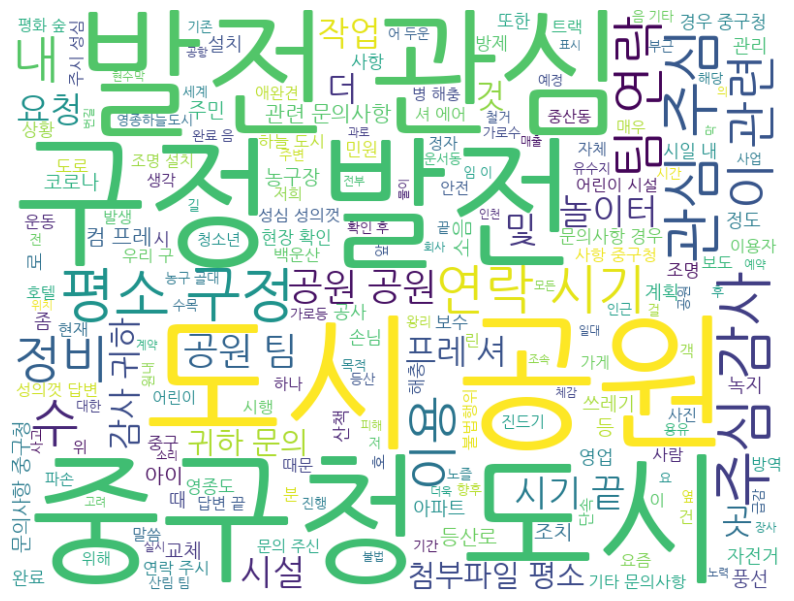

In [20]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt

okt = Okt()

# target_department: 검색하고자 하는 부서명
target_department = "국제도시건설국 도시공원과"

# 해당 부서의 데이터만 필터링
filtered_data = data[data['depart'] == target_department]

# 해당 부서의 'content'와 'answer_y' 열을 결합한 텍스트
filtered_text = ""
for _, row in filtered_data.iterrows():
    content = row['content'] + " " + row['answer_y'] if pd.notna(row['answer_y']) else row['content']
    nouns = okt.nouns(content)  # 형태소 분석 후 명사만 추출
    filtered_text += " ".join(nouns) + " "

# 워드클라우드 생성 및 출력
if filtered_text:  # 텍스트가 존재할 때만 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # Colab에서 설치된 폰트 경로
        background_color="white",
        width=800,
        height=600,
        max_words=200,  # 최대 단어 수 조절
        min_font_size=10,  # 최소 폰트 크기 조절
        max_font_size=150,  # 최대 폰트 크기 조절
        relative_scaling=0.5,  # 단어 크기의 상대적 스케일 조절
        colormap='viridis'  # 색상맵 조절
    ).generate(filtered_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No Data")
